# AlexNet

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
from torchvision import transforms, utils
from PIL import Image
import os
import pickle

In [2]:
def img_load(path):
    img = Image.open(path).convert('RGB')
    return img

In [3]:
def img_show(img):
    plt.imshow(img)
    plt.show()

In [4]:
file_path = 'x_train/'
img_number = 0
for i in os.listdir(file_path):
    if '.png' in i:
        img_number += 1
print(img_number)

60000


In [5]:
X_train = list()
for i in range(img_number):
    img_path = 'x_train/%s.png' % str(i)
    img = img_load(img_path)
    X_train.append(img)
print(len(X_train))

60000


In [8]:
with open("x_train.txt", "wb") as fp:
    pickle.dump(X_train, fp)

In [9]:
with open("x_train.txt", "rb") as fp:
    X_train = pickle.load(fp)

In [12]:
file_path = 'x_test/'
img_number = 0
for i in os.listdir(file_path):
    if '.png' in i:
        img_number += 1
print(img_number)

10000


In [13]:
X_test = list()
for i in range(img_number):
    img_path = 'x_test/%s.png' % str(i)
    img = img_load(img_path)
    X_test.append(img)
print(len(X_test))

10000


In [14]:
with open("x_test.txt", "wb") as fp:
    pickle.dump(X_test, fp)

In [15]:
y_train = np.load('y_train.npy') 
y_train = y_train.tolist()
print(len(y_train))

60000


In [16]:
with open("y_train.txt", "wb") as fp:
    pickle.dump(y_train, fp)

In [17]:
y_test = np.load('y_test.npy') 
y_test = y_test.tolist()
print(len(y_test))

10000


In [18]:
with open("y_test.txt", "wb") as fp:
    pickle.dump(y_test, fp)

In [19]:
class ListData(Dataset):
    
    def __init__(self, X_list, y_list, transform):
        self.X_list = X_list
        self.y_list = y_list
        self.transform = transform
        if len(self.X_list) == len(self.y_list):
            print('len(X_list) == len(y_list)')
        else:
            print('len(X_list) != len(y_list)')
        print('transform: %s' % self.transform)
            
    def __getitem__(self, index):
        if self.transform != None:
            X = self.transform(self.X_list[index])
            y = self.y_list[index]
        return X, y
    
    def __len__(self):
        return len(self.y_list)

In [20]:
transform = transforms.Compose([transforms.ToTensor()])

In [21]:
data_train = ListData(X_train, y_train, transform)
print(len(data_train))

len(X_list) == len(y_list)
transform: Compose(
    ToTensor()
)
60000


In [22]:
data_test = ListData(X_test, y_test, transform)
print(len(data_test))

len(X_list) == len(y_list)
transform: Compose(
    ToTensor()
)
10000


In [23]:
data_loader_train = torch.utils.data.DataLoader(
    dataset=data_train,
    batch_size=64,
    shuffle=True,
)

In [24]:
data_loader_test = torch.utils.data.DataLoader(
    dataset=data_test,
    batch_size=64,
    shuffle=True,
)

tensor([1, 1, 1, 4, 9, 5, 0, 6, 6, 1, 7, 8, 9, 8, 4, 8, 5, 8, 8, 2, 0, 2, 6, 5,
        9, 6, 1, 1, 6, 7, 1, 2, 6, 8, 0, 8, 6, 0, 9, 6, 1, 7, 3, 1, 6, 2, 7, 8,
        1, 9, 2, 6, 9, 3, 9, 6, 8, 0, 8, 6, 3, 8, 8, 7])


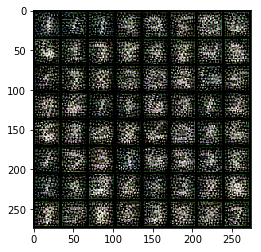

In [25]:
for data in data_loader_test:
    X_test, y_test = data
    print(y_test)
    img = torchvision.utils.make_grid(X_test) 
    img = img.numpy().transpose(1, 2, 0)
    plt.imshow(img)
    plt.show()
    break

In [89]:
class AlexNet(nn.Module):

    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 192, 3),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(192, 384, 3),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, 3),
            nn.ReLU(inplace=True),
#             nn.Conv2d(256, 256, 3),
#             nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x
    
model = AlexNet()
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=256, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_features=4096, bias=True)
    (5): ReLU(inplace)
    (6): Linear(in_features=4096, out_features=10, bias=True)
  )
)


In [90]:
cuda = get_cuda()
if torch.cuda.is_available():
    model.cuda()

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
epochs = 1
for epoch in range(epochs):
    running_loss = 0.0
    running_correct = 0
    for data in data_loader_train:
        X_train, y_train = data
        X_train, y_train = Variable(X_train), Variable(y_train)
        outputs = model(X_train) 
        pred = torch.max(outputs.data, 1)[1]
        optimizer.zero_grad()
        loss = loss_fn(outputs, y_train)
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0].item()
        running_correct += torch.sum(pred==y_train.data).item()
    testing_correct = 0
    for data in data_loader_test:
        X_test, y_test = data
        X_test, y_test = Variable(X_test), Variable(y_test)
        outputs = model(X_test)
        pred = torch.max(outputs.data, 1)[1]
        testing_correct += torch.sum(pred==y_test.data).item()
    print('epoch: %s' % (str(epoch + 1)))
    print('loss: %s' % str(running_loss / len(data_train)))
    print('training accuracy: %s' % str(running_correct / len(data_train)))
    print('testing accracy: %s' % str(testing_correct / len(data_test))) 
    print()

/Users/DannyShau/anaconda/envs/py3.6/lib/python3.6/site-packages/ipykernel/__main__.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [ ]:
torch.save(model, 'models/AlexNet')
model = torch.load('models/AlexNet')
print(model)